In [45]:
import pandas as pd
import geopandas as gpd
from numpy import arange
from shapely.geometry import Polygon

search_area = gpd.read_file('./4_search_area/search_area_100m_malta.shp')

#search_area = gpd.read_file('/Users/Zack/0_greece/dem_eu/mask_search_area_100m_5km.shp')
#search_area = gpd.read_file('/Users/Zack/1_sw_countries/search_area/search_area_100m_croatia.shp')
#search_area = gpd.read_file('/Users/Zack/1_sw_countries/search_area/search_area_100m_italy.shp')
#search_area = search_area.to_crs({'init': 'epsg:2100'})
search_area = search_area.to_crs({'init': 'epsg:4326'})

#grid = gpd.read_file('/Users/Zack/0_greece/AOI/greece_aoi_05deg.shp')
#print(grid.crs)
print(search_area.crs)

{'init': 'epsg:4326'}


In [46]:
#generate grid

#grid covering greece with specified degree grid
deg = 0.5

#spain
lon = list(arange(27, 47, deg)) #+1
lat = list(arange(-18, 60, deg)) #+1

#greece
#lon = list(arange(33, 42, deg)) #+1
#lat = list(arange(18, 31, deg)) #+1

#croatia?
#lon = list(arange(20, 46, deg)) #+1
#lat = list(arange(13, 41, deg)) #+1

#italy
#lon = list(arange(35, 47.5, deg)) #+1
#lat = list(arange(5.5, 19, deg)) #+1

#create lat list
lat_list=[]
for i in range(len(lat)):
    lat_pt = lat[i], lat[i], (lat[i]+deg), (lat[i]+deg)
    lat_list.append(lat_pt)

#create lon list
lon_list=[]
for i in range(len(lon)):
    lon_pt = lon[i], (lon[i]+deg), (lon[i]+deg), lon[i]
    lon_list.append(lon_pt)

#create polygons
geom_list = []
for i in range(len(lon_list)):
    for j in range(len(lat_list)):
        geom = Polygon(zip(lat_list[j], lon_list[i]))
        df = gpd.GeoDataFrame(index=[0], geometry=[geom])  
        geom_list.append(df)
        
#combine polygons
grid = gpd.GeoDataFrame(pd.concat(geom_list, ignore_index=True), crs = {'init': 'epsg:4326'})
grid.crs

{'init': 'epsg:4326'}

In [47]:
#export
#grid.to_file(filename='/Users/Zack/Desktop/greece_aoi_05deg.geojson', driver='GeoJSON')
#grid.to_file(filename='/Users/Zack/Desktop/greece_aoi_05deg.shp')

Wall time: 1.58 s


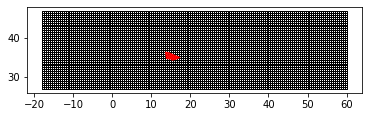

In [48]:
%%time 
#preview
#grid = grid.to_crs({'init': 'epsg:2100'})
ax = grid.plot(linewidth=1, edgecolor = 'black', facecolor = 'none')
search_area.plot(linewidth=0, edgecolor = 'none', facecolor = 'red', ax=ax)

6240
33
Wall time: 170 ms


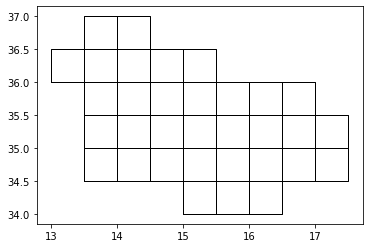

In [49]:
%%time
#select grid over search area
matches = grid.intersects(search_area.unary_union)
grid_matches = grid.loc[matches]

grid_matches.plot(linewidth=1, edgecolor = 'black', facecolor = 'none')
print(len(grid))
print(len(grid_matches))

In [50]:
#export
grid_matches.to_file("/Users/Zack/Desktop/malta_05deg_search_area.geojson", driver='GeoJSON')
grid_matches.to_file("/Users/Zack/Desktop/malta_05deg_search_area.shp")